<a href="https://colab.research.google.com/github/JuanApablaza/DESAFIO_TELECOMMX_LATAM_JA/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [29]:
import pandas as pd
import requests
from pandas import json_normalize

# 1. Extraer los datos del JSON
url = 'https://raw.githubusercontent.com/JuanApablaza/DESAFIO_TELECOMMX_LATAM_JA/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()

#🔧 Transformación

In [9]:


# 2. Crear el DataFrame inicial
df = pd.DataFrame(data)

# 3. Normalizar las columnas que contienen diccionarios
# Normalizar columna 'customer'
customer_norm = json_normalize(df['customer'])

# Normalizar columna 'phone'
phone_norm = json_normalize(df['phone'])

# Normalizar columna 'internet'
internet_norm = json_normalize(df['internet'])

# Normalizar columna 'account'
account_norm = json_normalize(df['account'])

# 4. Combinar todo en un DataFrame normalizado
df_normalized = pd.concat([
    df[['customerID', 'Churn']],  # Columnas que no son diccionarios
    customer_norm,
    phone_norm,
    internet_norm,
    account_norm
], axis=1)

# 5. Mostrar las primeras filas del DataFrame normalizado
print(df_normalized.head())

   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

In [30]:
df_normalized

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,fecha_ejemplo,fecha_ejemplo_normalizada
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,2023-01-01,2023-01-01
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,2023-01-02,2023-01-02
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2023-01-03,2023-01-03
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,2023-01-04,2023-01-04
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2023-01-05,2023-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,Yes,No,No,One year,No,Mailed check,55.15,742.9,2042-11-19,2042-11-19
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,2042-11-20,2042-11-20
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,2042-11-21,2042-11-21
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2042-11-22,2042-11-22


#📊 Carga y análisis

# **1.Explorar las columnas del dataset y verificar sus tipos de datos.**







In [31]:
# 1.Explorar las columnas del dataset y verificar sus tipos de datos.


def explorar_dataset(df):
    print("=== RESUMEN DEL DATASET ===")
    print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

    print("\n=== TIPOS DE DATOS ===")
    print(df.dtypes.value_counts())

    print("\n=== COLUMNAS NUMÉRICAS ===")
    num_cols = df.select_dtypes(include=['number']).columns
    print(num_cols)
    if len(num_cols) > 0:
        print("\nEstadísticas descriptivas:")
        print(df[num_cols].describe())



    print("\n=== COLUMNAS CATEGÓRICAS ===")
    #pandas.unique()
    cat_cols = df.select_dtypes(include=['object', 'bool', 'category']).columns
    print(cat_cols)
    if len(cat_cols) > 0:
        print("\nValores únicos (top 5 por columna):")
        for col in cat_cols:
            print(f"\n{col}:")
            print(df[col].value_counts(dropna=False).head())

    print("\n=== VALORES NULOS ===")
    print(df.isnull().sum().sort_values(ascending=False))

#otra forma de unique



# Usar la función
explorar_dataset(df_normalized)
# Versión resumida para exploración rápida
for col in df_normalized.columns: # Iterate over the columns of df_normalized
    print(f"\nColumna: {col}")
    print(f"Tipo: {df_normalized[col].dtype}")
    print(f"Valores únicos: {pd.unique(df_normalized[col])}")

=== RESUMEN DEL DATASET ===
Filas: 7267, Columnas: 23

=== TIPOS DE DATOS ===
object            18
int64              2
datetime64[ns]     2
float64            1
Name: count, dtype: int64

=== COLUMNAS NUMÉRICAS ===
Index(['SeniorCitizen', 'tenure', 'Charges.Monthly'], dtype='object')

Estadísticas descriptivas:
       SeniorCitizen       tenure  Charges.Monthly
count    7267.000000  7267.000000      7267.000000
mean        0.162653    32.346498        64.720098
std         0.369074    24.571773        30.129572
min         0.000000     0.000000        18.250000
25%         0.000000     9.000000        35.425000
50%         0.000000    29.000000        70.300000
75%         0.000000    55.000000        89.875000
max         1.000000    72.000000       118.750000

=== COLUMNAS CATEGÓRICAS ===
Index(['customerID', 'Churn', 'gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport

**Comprobación de incoherencias en los datos**
En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

In [32]:
#pandas.unique()
# Versión resumida para exploración rápida
for col in df_normalized.columns: # Iterate over the columns of df_normalized
    print(f"\nColumna: {col}")
    print(f"Tipo: {df_normalized[col].dtype}")
    print(f"Valores únicos: {pd.unique(df_normalized[col])}")


Columna: customerID
Tipo: object
Valores únicos: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Columna: Churn
Tipo: object
Valores únicos: ['No' 'Yes' '']

Columna: gender
Tipo: object
Valores únicos: ['Female' 'Male']

Columna: SeniorCitizen
Tipo: int64
Valores únicos: [0 1]

Columna: Partner
Tipo: object
Valores únicos: ['Yes' 'No']

Columna: Dependents
Tipo: object
Valores únicos: ['Yes' 'No']

Columna: tenure
Tipo: int64
Valores únicos: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Columna: PhoneService
Tipo: object
Valores únicos: ['Yes' 'No']

Columna: MultipleLines
Tipo: object
Valores únicos: ['No' 'Yes' 'No phone service']

Columna: InternetService
Tipo: object
Valores únicos: ['DSL' 'Fiber optic' 'No']

Columna: OnlineSecurity
Tipo: object
Valores únicos: ['No

In [34]:
#pandas.Series.dt.normalize()
import pandas as pd

# 1. Verificar columnas de fecha/hora en tu DataFrame
print("Columnas de fecha/hora en df_normalized:")
date_cols = df_normalized.select_dtypes(include=['datetime64']).columns
print(date_cols.tolist())

# Si no hay columnas datetime, vamos a crear una de ejemplo
if len(date_cols) == 0:
    print("\nNo se encontraron columnas de fecha/hora. Creando columna de ejemplo...")
    df_normalized['fecha_ejemplo'] = pd.date_range(start='2023-01-01', periods=len(df_normalized), freq='D')
    date_cols = ['fecha_ejemplo']

# 2. Aplicar normalize() a cada columna datetime
for col in date_cols:
    print(f"\nNormalizando columna: {col}")
    df_normalized[f'{col}_normalizada'] = df_normalized[col].dt.normalize()

    # Mostrar resultados
    print(df_normalized[[col, f'{col}_normalizada']].head())

# 3. Si necesitas convertir strings a datetime primero:
# Ejemplo para una columna llamada 'fecha_string' (si existe)
if 'fecha_string' in df_normalized.columns:
    df_normalized['fecha_datetime'] = pd.to_datetime(df_normalized['fecha_string'])
    df_normalized['fecha_datetime_normalizada'] = df_normalized['fecha_datetime'].dt.normalize()

Columnas de fecha/hora en df_normalized:
['fecha_ejemplo', 'fecha_ejemplo_normalizada']

Normalizando columna: fecha_ejemplo
  fecha_ejemplo fecha_ejemplo_normalizada
0    2023-01-01                2023-01-01
1    2023-01-02                2023-01-02
2    2023-01-03                2023-01-03
3    2023-01-04                2023-01-04
4    2023-01-05                2023-01-05

Normalizando columna: fecha_ejemplo_normalizada
  fecha_ejemplo_normalizada fecha_ejemplo_normalizada_normalizada
0                2023-01-01                            2023-01-01
1                2023-01-02                            2023-01-02
2                2023-01-03                            2023-01-03
3                2023-01-04                            2023-01-04
4                2023-01-05                            2023-01-05


In [36]:
df_normalized.head(20)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,fecha_ejemplo,fecha_ejemplo_normalizada,fecha_ejemplo_normalizada_normalizada
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,One year,Yes,Mailed check,65.60,593.3,2023-01-01,2023-01-01,2023-01-01
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,2023-01-02,2023-01-02,2023-01-02
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2023-01-03,2023-01-03,2023-01-03
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,2023-01-04,2023-01-04,2023-01-04
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2023-01-05,2023-01-05,2023-01-05
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45,2023-01-06,2023-01-06,2023-01-06
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25,2023-01-07,2023-01-07,2023-01-07
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8,2023-01-08,2023-01-08,2023-01-08
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,Month-to-month,Yes,Electronic check,48.20,340.35,2023-01-09,2023-01-09,2023-01-09
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9,2023-01-10,2023-01-10,2023-01-10


Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

# **2.Consultar el diccionario para comprender mejor el significado de las variables.** **texto en negrita**



### **Diccionario de datos**#

**https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/main/TelecomX_diccionario.md**

customerID: número de identificación único de cada cliente
Churn: si el cliente dejó o no la empresa
gender: género (masculino y femenino)
SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
Partner: si el cliente tiene o no una pareja
Dependents: si el cliente tiene o no dependientes
tenure: meses de contrato del cliente
PhoneService: suscripción al servicio telefónico
MultipleLines: suscripción a más de una línea telefónica
InternetService: suscripción a un proveedor de internet
OnlineSecurity: suscripción adicional de seguridad en línea
OnlineBackup: suscripción adicional de respaldo en línea
DeviceProtection: suscripción adicional de protección del dispositivo
TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
StreamingTV: suscripción de televisión por cable
StreamingMovies: suscripción de streaming de películas
Contract: tipo de contrato
PaperlessBilling: si el cliente prefiere recibir la factura en línea
PaymentMethod: forma de pago
Charges.Monthly: total de todos los servicios del cliente por mes
Charges.Total: total gastado por el cliente

# **3.Identificar las columnas más relevantes para el análisis de evasión.**

Promt : cuales con las  columnas más relevantes para el análisis de evasión ?

Respuesta Chat GPT:
Columnas relevantes para el análisis de evasión (Churn)
Basándome en el dataset de telecomunicaciones que estás analizando, estas son las columnas más relevantes para predecir o analizar el Churn (abandono/evasión de clientes), agrupadas por categorías:

1. Columnas fundamentales (obligatorias)
Churn: La variable objetivo (Sí/No) que indica si el cliente abandonó el servicio

customerID: Identificador único del cliente (útil para tracking pero no para modelado)

2. Datos demográficos del cliente (pueden indicar patrones)
gender: Género (posibles diferencias en comportamiento)

SeniorCitizen: Si es adulto mayor (1) o no (0) - grupo de alto riesgo

Partner: Si tiene pareja (puede afectar decisiones económicas)

Dependents: Si tiene dependientes (afecta capacidad de pago)

3. Información de servicios contratados (predictores clave)
PhoneService: Si tiene servicio telefónico

MultipleLines: Si tiene múltiples líneas

InternetService: Tipo de servicio (DSL, Fibra óptica, No)

OnlineSecurity: Contrató seguridad online (clientes con seguridad suelen tener menos Churn)

OnlineBackup: Backup online

DeviceProtection: Protección de dispositivo

TechSupport: Soporte técnico

StreamingTV y StreamingMovies: Servicios de streaming

4. Información de facturación y contrato (predictores fuertes)
Contract: Tipo de contrato (Mes a mes, 1 año, 2 años) - El más importante

PaperlessBilling: Factura electrónica (puede asociarse a mayor Churn)

PaymentMethod: Método de pago (p.ej. transferencia electrónica suele tener más Churn)

MonthlyCharges: Cargos mensuales (clientes con cargos altos más propensos a irse)

TotalCharges: Cargos totales (clientes con mucha inversión previa menos propensos)

5. Columnas calculadas potencialmente útiles
Tenure (si está disponible): Antigüedad del cliente en meses

ChargeRatio: MonthlyCharges/TotalCharges (podrías crear esta feature)

Columnas menos relevantes para Churn:
customerID: Solo identificador

customer_... (datos muy básicos sin poder predictivo demostrado)

Análisis recomendado:

In [15]:
#Análisis recomendado:
# Filtrar solo columnas relevantes
# Columnas relevantes ajustadas a lo que probablemente tienes
churn_columns = [
    'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
    'PaymentMethod'
]

# Agregamos las columnas de cargos si existen con otros nombres
possible_charge_columns = ['MonthlyCharges', 'TotalCharges', 'account_MonthlyCharges', 'account_TotalCharges']

for col in possible_charge_columns:
    if col in df_normalized.columns:
        churn_columns.append(col)

# Ahora creamos el DataFrame de análisis
df_churn = df_normalized[churn_columns]

# Verificamos
print("\nColumnas seleccionadas para análisis de Churn:")
print(df_churn.columns.tolist())


Columnas seleccionadas para análisis de Churn:
['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


# **Manejo de inconsistencias**

In [37]:
#Promt : deseo en el df_normalized reemplazar el valor "No phone service" a "No" en la columna MultipleLines
df_normalized['MultipleLines'] = df_normalized['MultipleLines'].apply(
    lambda x: "No" if x == "No phone service" else x
)

# Verificar
print(df_normalized['MultipleLines'].unique())

['No' 'Yes']


In [ ]:
#📊 Carga y análisis(L - Load & Analysis)

# **Análisis Descriptivo**
Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

📌 Consejos:

🔗 Documentación de DataFrame.describe()

In [ ]:
#Promt : Análisis Descriptivo
#Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar
# y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

#Vamos a realizar un análisis descriptivo completo del DataFrame df_normalized, enfocándonos en métricas clave para entender la
#distribución y comportamiento de los clientes, especialmente en relación con el Churn (abandono).

In [39]:
#1. Análisis General del DataFrame
#python
# Ver estructura del dataset
print(f"Filas: {df_normalized.shape[0]}, Columnas: {df_normalized.shape[1]}")
print("\nTipos de datos por columna:")
print(df_normalized.dtypes.value_counts())

# Resumen rápido de variables numéricas y categóricas
print("\nResumen estadístico de variables numéricas:")
print(df_normalized.describe(include=['int64', 'float64']))

print("\nResumen de variables categóricas:")
print(df_normalized.describe(include=['object', 'bool']))

Filas: 7267, Columnas: 24

Tipos de datos por columna:
object            18
datetime64[ns]     3
int64              2
float64            1
Name: count, dtype: int64

Resumen estadístico de variables numéricas:
       SeniorCitizen       tenure  Charges.Monthly
count    7267.000000  7267.000000      7267.000000
mean        0.162653    32.346498        64.720098
std         0.369074    24.571773        30.129572
min         0.000000     0.000000        18.250000
25%         0.000000     9.000000        35.425000
50%         0.000000    29.000000        70.300000
75%         0.000000    55.000000        89.875000
max         1.000000    72.000000       118.750000

Resumen de variables categóricas:
        customerID Churn gender Partner Dependents PhoneService MultipleLines  \
count         7267  7267   7267    7267       7267         7267          7267   
unique        7267     3      2       2          2            2             2   
top     9995-HOTOH    No   Male      No         No   

In [46]:
#2. Análisis de Variables Numéricas
#Métricas clave: media, mediana, desviación estándar, rangos
#python
numeric_cols = df_normalized.select_dtypes(include=['int64', 'float64']).columns

if not numeric_cols.empty:
    print("\nAnálisis detallado de variables numéricas:")
    stats_df = df_normalized[numeric_cols].agg(['mean', 'median', 'std', 'min', 'max', 'skew'])
    print(stats_df)
else:
    print("\nNo hay columnas numéricas para analizar.")


Análisis detallado de variables numéricas:
        SeniorCitizen     tenure  Charges.Monthly
mean         0.162653  32.346498        64.720098
median       0.000000  29.000000        70.300000
std          0.369074  24.571773        30.129572
min          0.000000   0.000000        18.250000
max          1.000000  72.000000       118.750000
skew         1.828574   0.239523        -0.216539


In [45]:
#3. Análisis de Variables Categóricas
#Distribución de frecuencias y moda
#python
categorical_cols = df_normalized.select_dtypes(include=['object', 'bool']).columns

if not categorical_cols.empty:
    print("\nDistribución de variables categóricas:")
    for col in categorical_cols:
        print(f"\n🔹 Columna: {col}")
        print(df_normalized[col].value_counts(normalize=True) * 100)  # Porcentajes
else:
    print("\nNo hay columnas categóricas para analizar.")


Distribución de variables categóricas:

🔹 Columna: customerID
customerID
9995-HOTOH    0.013761
0002-ORFBO    0.013761
0003-MKNFE    0.013761
9970-QBCDA    0.013761
9968-FFVVH    0.013761
                ...   
0014-BMAQU    0.013761
0013-SMEOE    0.013761
0013-MHZWF    0.013761
0013-EXCHZ    0.013761
0011-IGKFF    0.013761
Name: proportion, Length: 7267, dtype: float64

🔹 Columna: Churn
Churn
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64

🔹 Columna: gender
gender
Male      50.571075
Female    49.428925
Name: proportion, dtype: float64

🔹 Columna: Partner
Partner
No     51.589377
Yes    48.410623
Name: proportion, dtype: float64

🔹 Columna: Dependents
Dependents
No     69.987615
Yes    30.012385
Name: proportion, dtype: float64

🔹 Columna: PhoneService
PhoneService
Yes    90.271088
No      9.728912
Name: proportion, dtype: float64

🔹 Columna: MultipleLines
MultipleLines
No     57.823036
Yes    42.176964
Name: proportion, dtype: float64

🔹 Columna:

In [43]:
#4. Análisis Comparativo por Churn
#¿Cómo difieren las métricas entre clientes que se van y los que se quedan?
#python
if 'Churn' in df_normalized.columns:
    print("\nComparación entre clientes que abandonan (Churn=Yes) vs los que no (Churn=No):")

    # Para variables numéricas
    if not numeric_cols.empty:
        print("\n🔢 Estadísticas por Churn (numéricas):")
        print(df_normalized.groupby('Churn')[numeric_cols].agg(['mean', 'median', 'std']))

    # Para variables categóricas
    if not categorical_cols.empty:
        print("\n📊 Distribución categórica por Churn (%):")
        for col in categorical_cols:
            if col != 'Churn':
                print(f"\n{col}:")
                print(pd.crosstab(df_normalized['Churn'], df_normalized[col], normalize='columns') * 100)
else:
    print("\nNo se encontró la columna 'Churn' en el DataFrame.")


Comparación entre clientes que abandonan (Churn=Yes) vs los que no (Churn=No):

🔢 Estadísticas por Churn (numéricas):
      SeniorCitizen                      tenure                    \
               mean median       std       mean median        std   
Churn                                                               
           0.178571    0.0  0.383851  31.571429   29.0  24.998552   
No         0.128721    0.0  0.334923  37.569965   38.0  24.113777   
Yes        0.254682    0.0  0.435799  17.979133   10.0  19.531123   

      Charges.Monthly                     
                 mean  median        std  
Churn                                     
            63.412277  69.100  31.388712  
No          61.265124  64.425  31.092648  
Yes         74.441332  79.650  24.666053  

📊 Distribución categórica por Churn (%):

customerID:
customerID  0002-ORFBO  0003-MKNFE  0004-TLHLJ  0011-IGKFF  0013-EXCHZ  \
Churn                                                                    
     

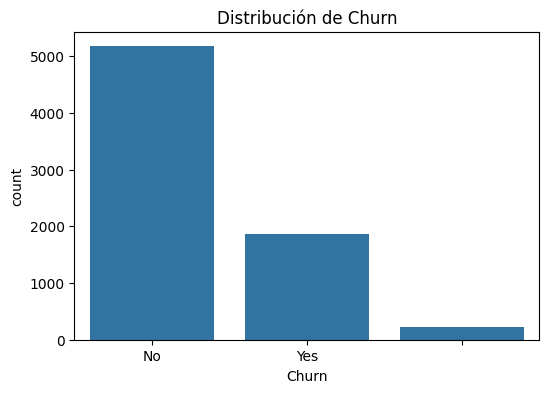

In [44]:
#5. Visualización de Datos (Opcional)
#python
import matplotlib.pyplot as plt
import seaborn as sns

# Ejemplo: Distribución de Churn
if 'Churn' in df_normalized.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_normalized, x='Churn')
    plt.title("Distribución de Churn")
    plt.show()

# Ejemplo: Boxplot de MonthlyCharges por Churn
if 'MonthlyCharges' in df_normalized.columns and 'Churn' in df_normalized.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_normalized, x='Churn', y='MonthlyCharges')
    plt.title("Cargos mensuales vs Churn")
    plt.show()

# **Recuento de evasión por variables categóricas**
Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.


In [48]:
#Recuento de Evasión (Churn) por Variables Categóricas
#A continuación, analizaremos cómo se distribuye el Churn en función de las principales variables categóricas del dataset. Esto nos permitirá identificar qué grupos de clientes tienen mayor probabilidad de abandonar el servicio.

#1. Preparación de los Datos
#python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurémonos de que 'Churn' está en formato binario para cálculos
df_normalized['Churn_bin'] = df_normalized['Churn'].map({'Yes': 1, 'No': 0})

# Lista de variables categóricas clave para analizar
categorical_vars = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
    'PaymentMethod'
]

# Filtramos solo las columnas que existen en el DataFrame
categorical_vars = [var for var in categorical_vars if var in df_normalized.columns]

📊 Porcentaje de Evasión (Churn) por Variable Categórica:


🔹 gender:
gender
Female    26.9%
Male      26.2%
Name: Churn_bin, dtype: object


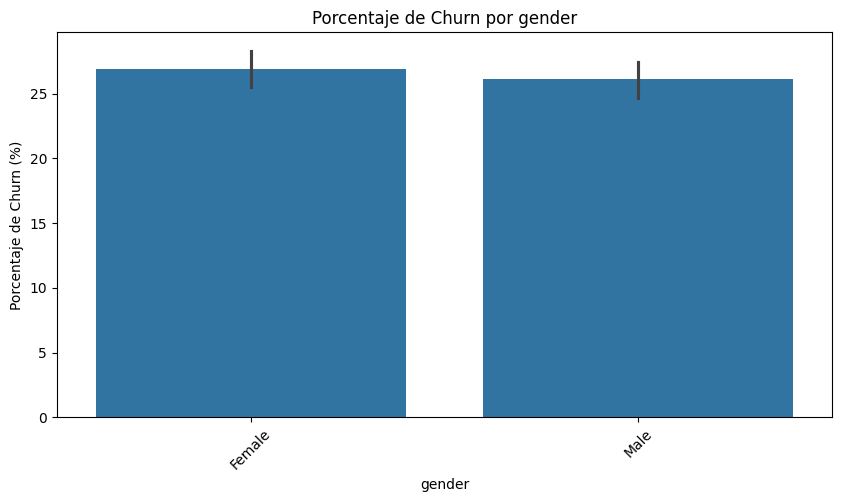


🔹 SeniorCitizen:
SeniorCitizen
1    41.7%
0    23.6%
Name: Churn_bin, dtype: object


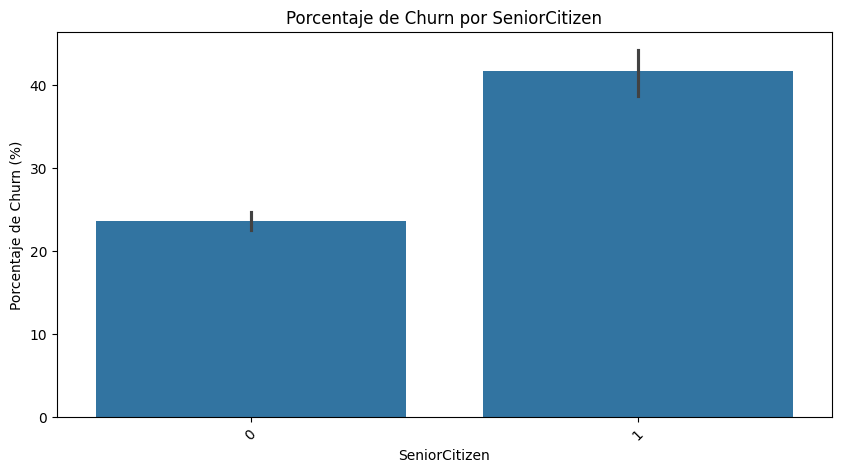


🔹 Partner:
Partner
No     33.0%
Yes    19.7%
Name: Churn_bin, dtype: object


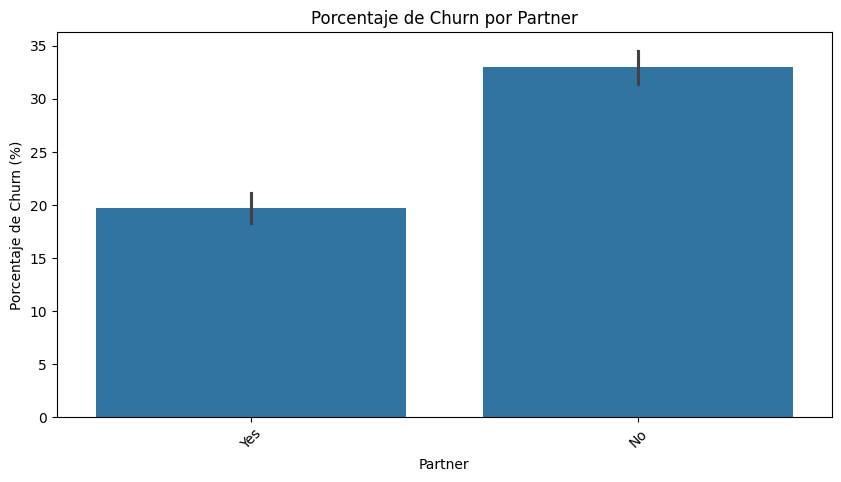


🔹 Dependents:
Dependents
No     31.3%
Yes    15.5%
Name: Churn_bin, dtype: object


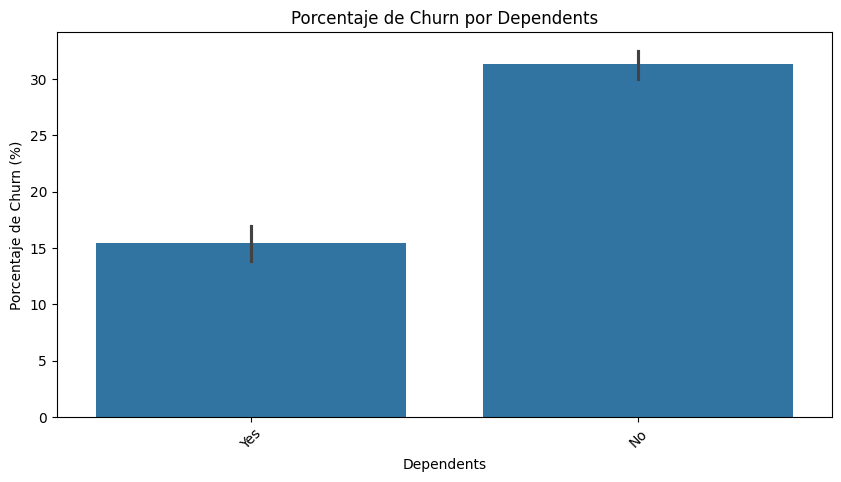


🔹 PhoneService:
PhoneService
Yes    26.7%
No     24.9%
Name: Churn_bin, dtype: object


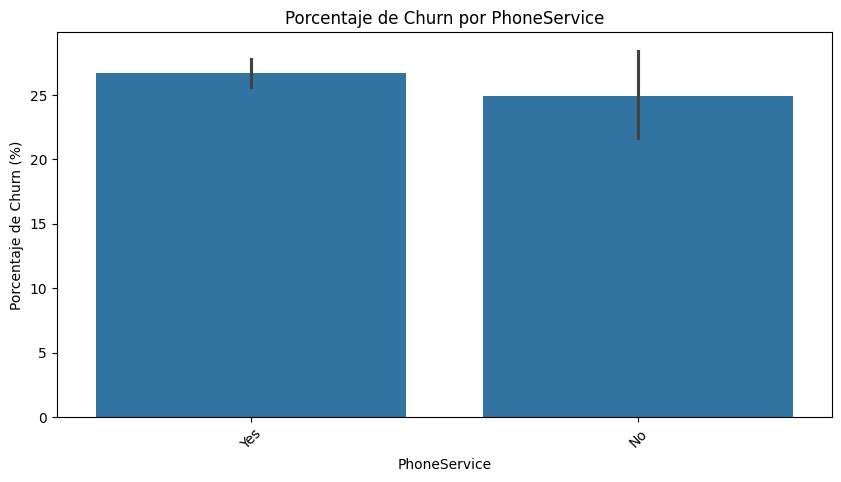


🔹 MultipleLines:
MultipleLines
Yes    28.6%
No     25.0%
Name: Churn_bin, dtype: object


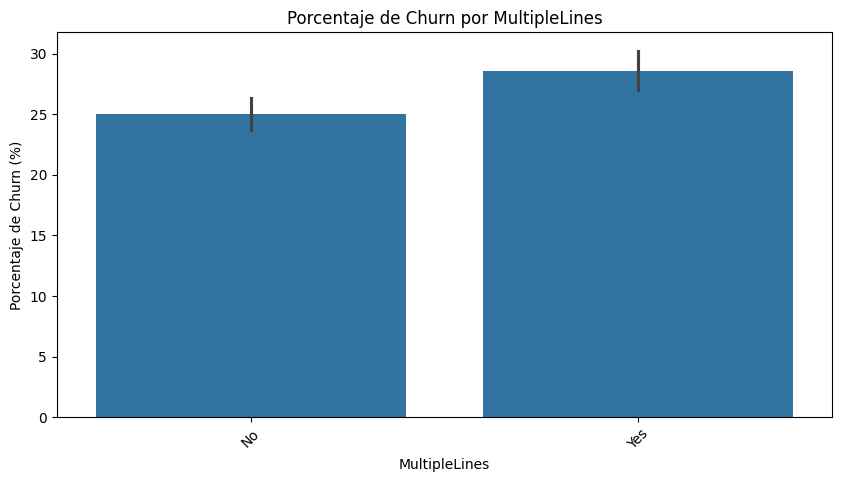


🔹 InternetService:
InternetService
Fiber optic    41.9%
DSL            19.0%
No              7.4%
Name: Churn_bin, dtype: object


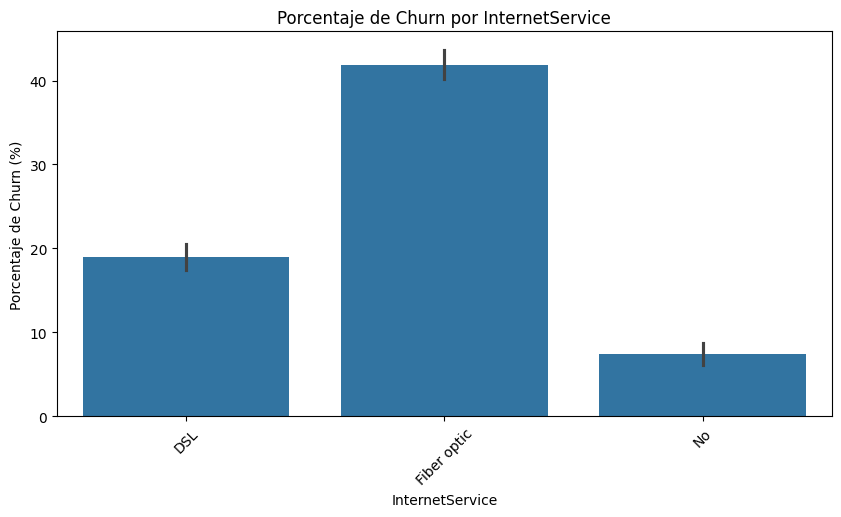


🔹 OnlineSecurity:
OnlineSecurity
No                     41.8%
Yes                    14.6%
No internet service     7.4%
Name: Churn_bin, dtype: object


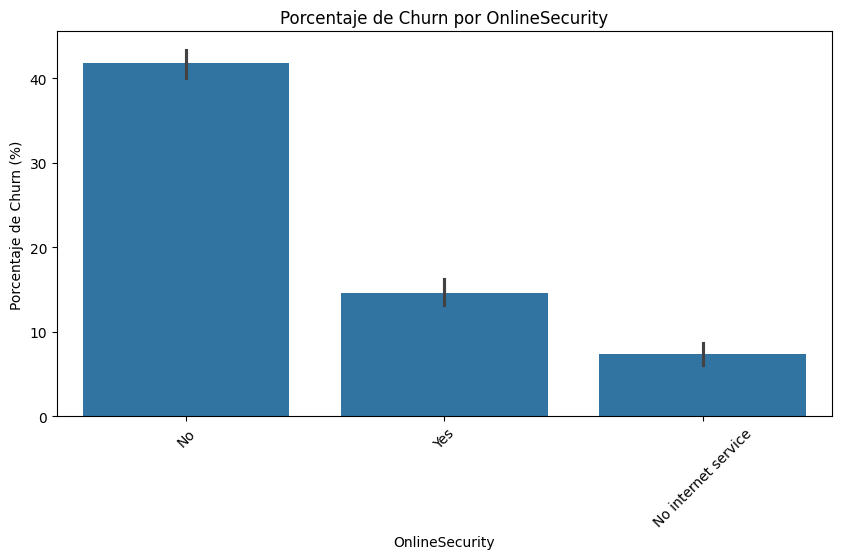


🔹 OnlineBackup:
OnlineBackup
No                     39.9%
Yes                    21.5%
No internet service     7.4%
Name: Churn_bin, dtype: object


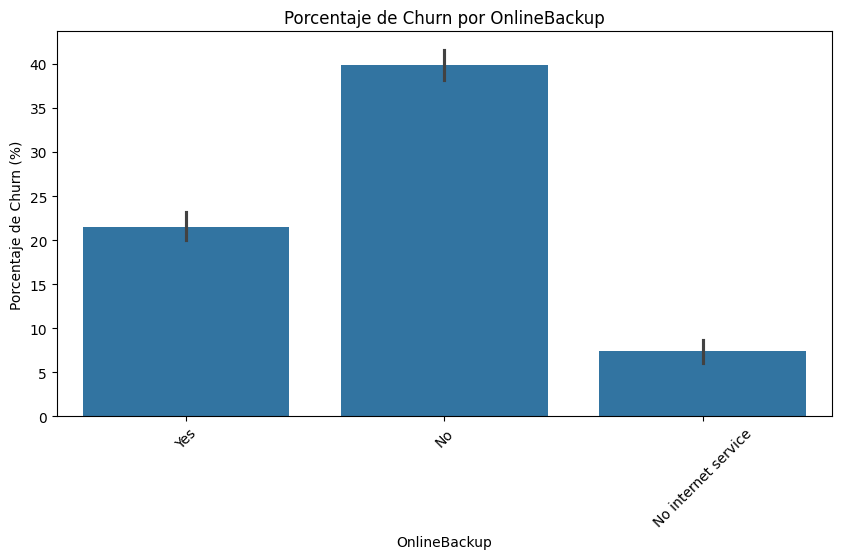


🔹 DeviceProtection:
DeviceProtection
No                     39.1%
Yes                    22.5%
No internet service     7.4%
Name: Churn_bin, dtype: object


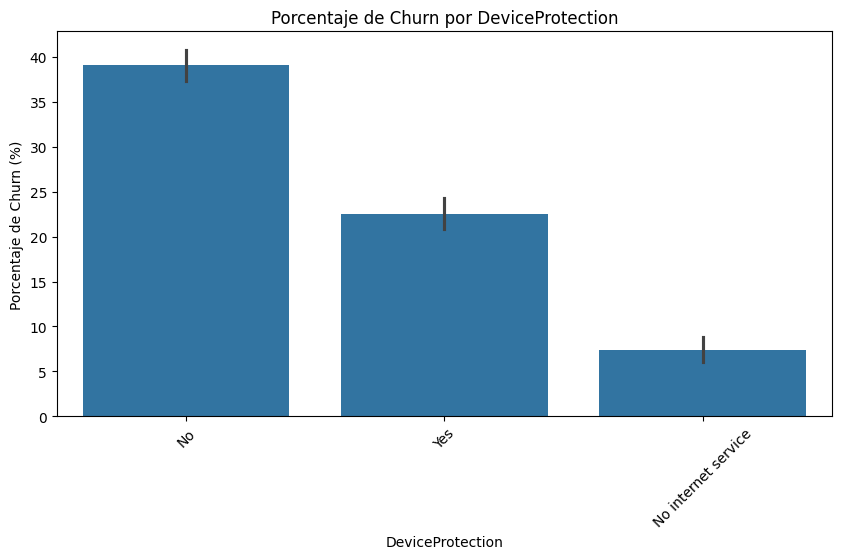


🔹 TechSupport:
TechSupport
No                     41.6%
Yes                    15.2%
No internet service     7.4%
Name: Churn_bin, dtype: object


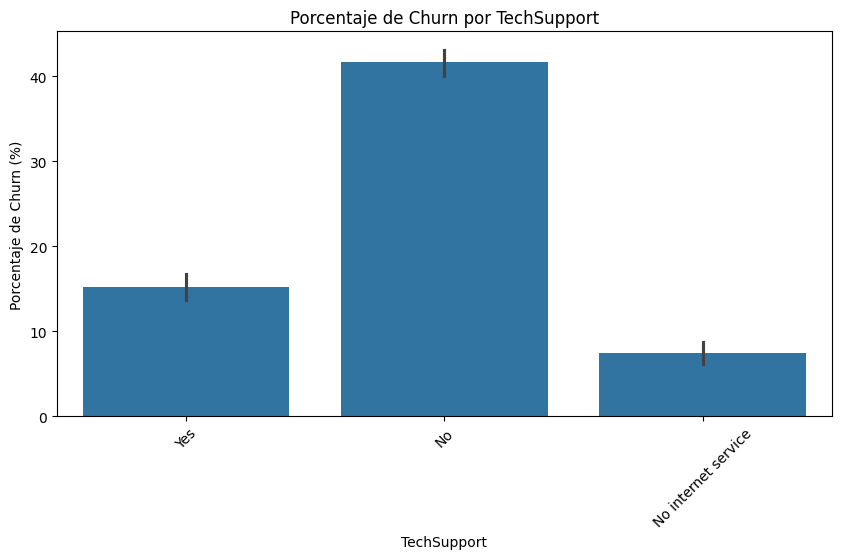


🔹 StreamingTV:
StreamingTV
No                     33.5%
Yes                    30.1%
No internet service     7.4%
Name: Churn_bin, dtype: object


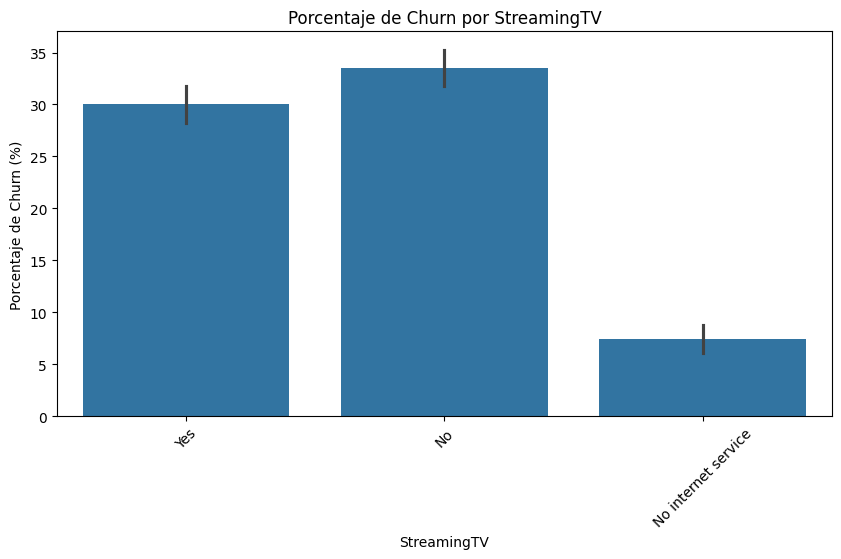


🔹 StreamingMovies:
StreamingMovies
No                     33.7%
Yes                    29.9%
No internet service     7.4%
Name: Churn_bin, dtype: object


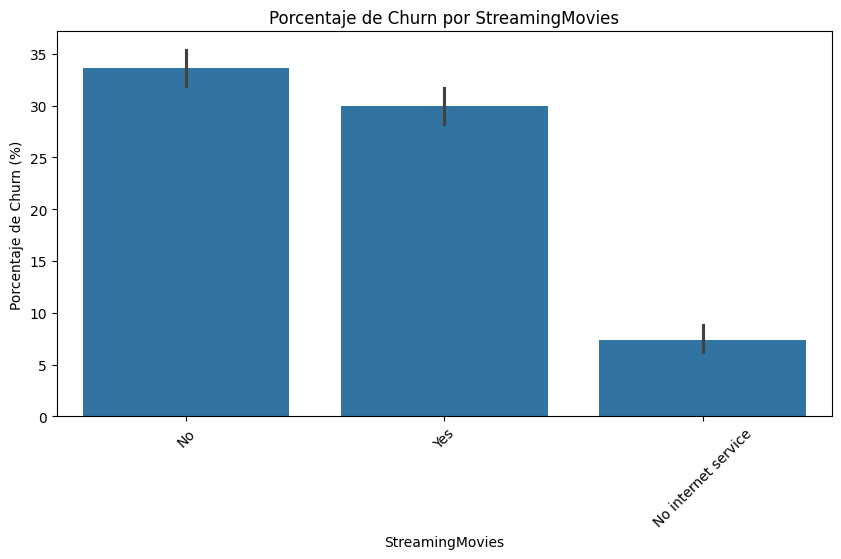


🔹 Contract:
Contract
Month-to-month    42.7%
One year          11.3%
Two year           2.8%
Name: Churn_bin, dtype: object


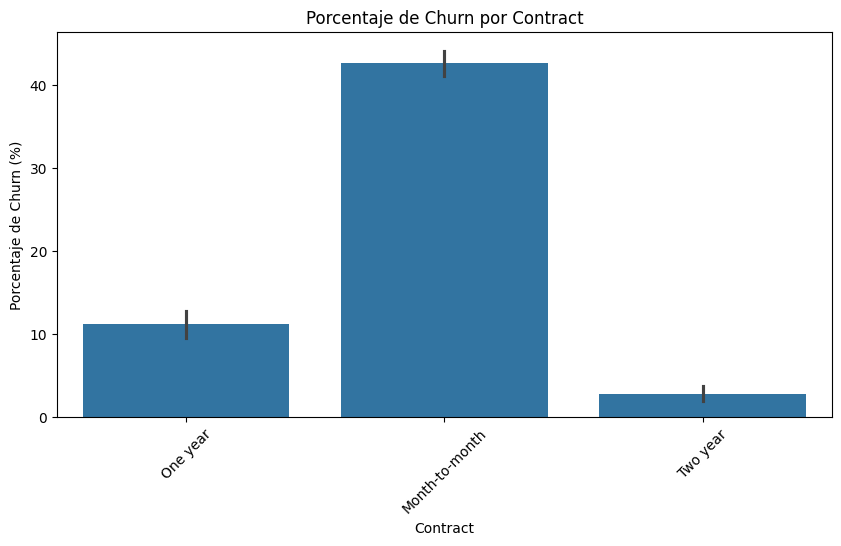


🔹 PaperlessBilling:
PaperlessBilling
Yes    33.6%
No     16.3%
Name: Churn_bin, dtype: object


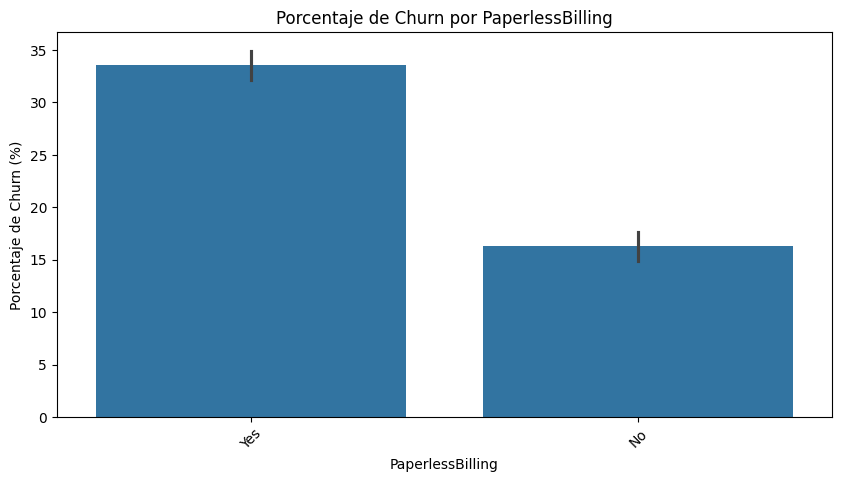


🔹 PaymentMethod:
PaymentMethod
Electronic check             45.3%
Mailed check                 19.1%
Bank transfer (automatic)    16.7%
Credit card (automatic)      15.2%
Name: Churn_bin, dtype: object


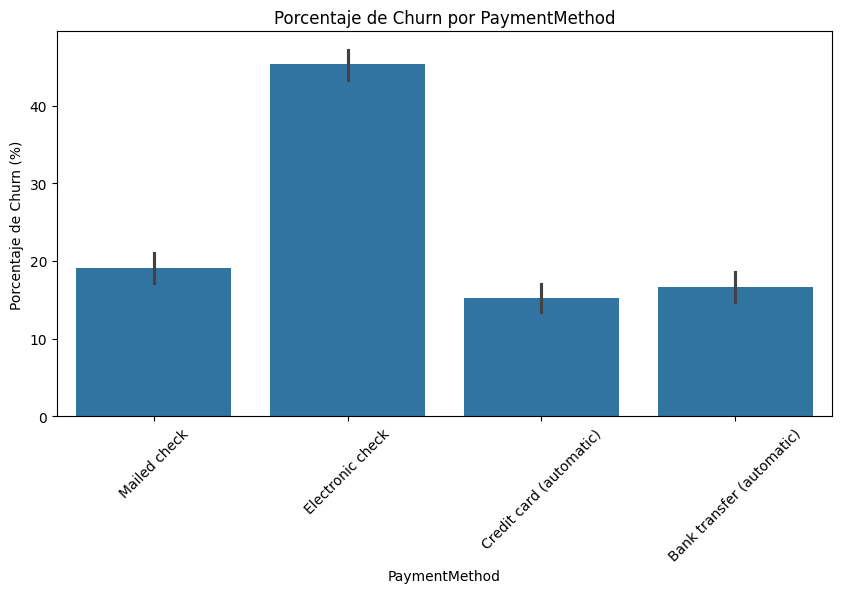

In [49]:
#2. Análisis de Porcentaje de Churn por Categoría
#python
print("📊 Porcentaje de Evasión (Churn) por Variable Categórica:\n")

for var in categorical_vars:
    # Calculamos el porcentaje de Churn por categoría
    churn_rate = df_normalized.groupby(var)['Churn_bin'].mean() * 100

    print(f"\n🔹 {var}:")
    print(churn_rate.sort_values(ascending=False).round(1).astype(str) + "%")

    # Gráfico de barras
    plt.figure(figsize=(10, 5))
    sns.barplot(x=var, y='Churn_bin', data=df_normalized, estimator=lambda x: sum(x)*100/len(x))
    plt.title(f'Porcentaje de Churn por {var}')
    plt.ylabel('Porcentaje de Churn (%)')
    plt.xticks(rotation=45)
    plt.show()

In [50]:
#4. Tabla Resumen de Churn por Categoría
#python
# Creamos un resumen en DataFrame
churn_summary = pd.DataFrame()

for var in categorical_vars:
    temp_df = df_normalized.groupby(var)['Churn_bin'].agg(['mean', 'count'])
    temp_df['mean'] = temp_df['mean'] * 100  # Convertir a porcentaje
    temp_df = temp_df.rename(columns={'mean': 'Churn Rate (%)', 'count': 'Clientes'})
    temp_df.reset_index(inplace=True)
    temp_df['Variable'] = var
    churn_summary = pd.concat([churn_summary, temp_df])

# Mostramos las 10 categorías con mayor Churn
print("\n🔝 Top 10 Categorías con Mayor Porcentaje de Churn:")
print(churn_summary.sort_values('Churn Rate (%)', ascending=False).head(10).to_string(index=False))


🔝 Top 10 Categorías con Mayor Porcentaje de Churn:
gender  Churn Rate (%)  Clientes         Variable  SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies       Contract PaperlessBilling    PaymentMethod
   NaN       45.285412      2365    PaymentMethod            NaN     NaN        NaN          NaN           NaN             NaN            NaN          NaN              NaN         NaN         NaN             NaN            NaN              NaN Electronic check
   NaN       42.709677      3875         Contract            NaN     NaN        NaN          NaN           NaN             NaN            NaN          NaN              NaN         NaN         NaN             NaN Month-to-month              NaN              NaN
   NaN       41.892765      3096  InternetService            NaN     NaN        NaN          NaN           NaN     Fiber optic            NaN          NaN           

# **Conteo de evasión por variables numéricas**

Promt"En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes."



In [52]:
#Conteo de Evasión por Variables Numéricas
#A continuación, analizaremos cómo se distribuyen las variables numéricas entre clientes que cancelaron (Churn=Yes) y los que permanecieron (Churn=No). Esto nos ayudará a identificar patrones numéricos asociados con la evasión.


In [62]:
#1. Preparación de los Datos
#python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurémonos de que 'Churn' está en formato binario para cálculos
df_normalized['Churn_bin'] = df_normalized['Churn'].map({'Yes': 1, 'No': 0})

# Lista de variables categóricas clave para analizar
categorical_vars = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
    'PaymentMethod'
]

# Filtramos solo las columnas que existen en el DataFrame
categorical_vars = [var for var in categorical_vars if var in df_normalized.columns]

In [64]:
#2. Análisis de Porcentaje de Churn por Categoría

print("📊 Porcentaje de Evasión (Churn) por Variable Categórica:\n")

for var in categorical_vars:
    # Calculamos el porcentaje de Churn por categoría
    churn_rate = df_normalized.groupby(var)['Churn_bin'].mean() * 100

    print(f"\n🔹 {var}:")
    print(churn_rate.sort_values(ascending=False).round(1).astype(str) + "%")

    # Gráfico de barras
    #plt.figure(figsize=(10, 5))
    #sns.barplot(x=var, y='Churn_bin', data=df_normalized, estimator=lambda x: sum(x)*100/len(x))
    #plt.title(f'Porcentaje de Churn por {var}')
    #plt.ylabel('Porcentaje de Churn (%)')
    #plt.xticks(rotation=45)
    #plt.show()

📊 Porcentaje de Evasión (Churn) por Variable Categórica:


🔹 gender:
gender
Female    26.9%
Male      26.2%
Name: Churn_bin, dtype: object

🔹 SeniorCitizen:
SeniorCitizen
1    41.7%
0    23.6%
Name: Churn_bin, dtype: object

🔹 Partner:
Partner
No     33.0%
Yes    19.7%
Name: Churn_bin, dtype: object

🔹 Dependents:
Dependents
No     31.3%
Yes    15.5%
Name: Churn_bin, dtype: object

🔹 PhoneService:
PhoneService
Yes    26.7%
No     24.9%
Name: Churn_bin, dtype: object

🔹 MultipleLines:
MultipleLines
Yes    28.6%
No     25.0%
Name: Churn_bin, dtype: object

🔹 InternetService:
InternetService
Fiber optic    41.9%
DSL            19.0%
No              7.4%
Name: Churn_bin, dtype: object

🔹 OnlineSecurity:
OnlineSecurity
No                     41.8%
Yes                    14.6%
No internet service     7.4%
Name: Churn_bin, dtype: object

🔹 OnlineBackup:
OnlineBackup
No                     39.9%
Yes                    21.5%
No internet service     7.4%
Name: Churn_bin, dtype: object

🔹 DeviceP

In [65]:
# Creamos un resumen en DataFrame
churn_summary = pd.DataFrame()

for var in categorical_vars:
    temp_df = df_normalized.groupby(var)['Churn_bin'].agg(['mean', 'count'])
    temp_df['mean'] = temp_df['mean'] * 100  # Convertir a porcentaje
    temp_df = temp_df.rename(columns={'mean': 'Churn Rate (%)', 'count': 'Clientes'})
    temp_df.reset_index(inplace=True)
    temp_df['Variable'] = var
    churn_summary = pd.concat([churn_summary, temp_df])

# Mostramos las 10 categorías con mayor Churn
print("\n🔝 Top 10 Categorías con Mayor Porcentaje de Churn:")
print(churn_summary.sort_values('Churn Rate (%)', ascending=False).head(10).to_string(index=False))


🔝 Top 10 Categorías con Mayor Porcentaje de Churn:
gender  Churn Rate (%)  Clientes         Variable  SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies       Contract PaperlessBilling    PaymentMethod
   NaN       45.285412      2365    PaymentMethod            NaN     NaN        NaN          NaN           NaN             NaN            NaN          NaN              NaN         NaN         NaN             NaN            NaN              NaN Electronic check
   NaN       42.709677      3875         Contract            NaN     NaN        NaN          NaN           NaN             NaN            NaN          NaN              NaN         NaN         NaN             NaN Month-to-month              NaN              NaN
   NaN       41.892765      3096  InternetService            NaN     NaN        NaN          NaN           NaN     Fiber optic            NaN          NaN           

In [66]:
# Versión con conteo de clientes por categoría
churn_summary_list = []

for var in categorical_vars:
    # Calcular porcentaje y conteo
    churn_stats = df_normalized.groupby(var)['Churn_bin'].agg(['mean', 'count'])
    churn_stats['mean'] = churn_stats['mean'] * 100

    # Crear DataFrame temporal
    temp_df = churn_stats.reset_index()
    temp_df.columns = ['Categoría', 'Porcentaje_Churn', 'Total_Clientes']
    temp_df['Variable'] = var

    churn_summary_list.append(temp_df)

# Concatenar y ordenar
churn_summary_df = pd.concat(churn_summary_list, ignore_index=True)
churn_summary_df = churn_summary_df.sort_values('Porcentaje_Churn', ascending=False)

# Formatear
churn_summary_df['Porcentaje_Churn'] = churn_summary_df['Porcentaje_Churn'].round(1).astype(str) + '%'

# Mostrar
print("📊 Resumen Detallado de Churn por Categoría:")
display(churn_summary_df[['Variable', 'Categoría', 'Porcentaje_Churn', 'Total_Clientes']].reset_index(drop=True))

📊 Resumen Detallado de Churn por Categoría:


,Variable,Categoría,Porcentaje_Churn,Total_Clientes
0,PaymentMethod,Electronic check,45.3%,2365
1,Contract,Month-to-month,42.7%,3875
2,InternetService,Fiber optic,41.9%,3096
3,OnlineSecurity,No,41.8%,3498
4,SeniorCitizen,1,41.7%,1142
5,TechSupport,No,41.6%,3473
6,OnlineBackup,No,39.9%,3088
7,DeviceProtection,No,39.1%,3095
8,StreamingMovies,No,33.7%,2785
9,PaperlessBilling,Yes,33.6%,4171


5. Interpretación de Resultados
Variables con Churn > 30% son de alto riesgo y deben priorizarse en estrategias de retención.

Variables con Churn < 10% representan clientes estables (ej: contratos anuales).

Variables con muchos clientes pero Churn medio (ej: InternetService=Fiber optic) requieren atención inmediata por volumen.

6. Recomendaciones Accionables
Enfoque en contratos mensuales: Ofrecer incentivos para migrar a planes anuales.

Clientes con fibra óptica: Revisar calidad del servicio/expectativas.

Quienes pagan con electronic check: Implementar recordatorios de pago automáticos.

# **INFORME FINAL**


inaliza el desafío elaborando un informe dentro del mismo notebook que resuma todo el trabajo realizado. El informe debe incluir:

🔹 Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).

🔹 Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

🔹 Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

🔹 Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.

Asegúrate de que el informe esté bien estructurado, claro y respaldado por visualizaciones que refuercen tus conclusiones. 🚀

# **Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn)**


**Introducción**


En el competitivo mercado de las telecomunicaciones, la retención de clientes es un factor crítico para el éxito empresarial. El Churn (o tasa de evasión) representa el porcentaje de clientes que deciden cancelar su servicio en un período determinado. Este fenómeno impacta directamente en:

**📉 Pérdida de ingresos recurrentes**

💰 Mayores costos de adquisición (cuesta 5-25 veces más conseguir un nuevo cliente que retener uno existente)

📊 Reducción del valor de por vida del cliente (LTV)

**Objetivo del Análisis**
Este estudio busca:

Identificar patrones en el comportamiento de clientes que abandonan el servicio.

Determinar factores clave asociados a la evasión (variables demográficas, de contrato, uso de servicios, etc.).

Proporcionar insights accionables para:

Desarrollar estrategias de retención personalizadas.

Priorizar intervenciones comerciales en grupos de alto riesgo.

Optimizar políticas de fidelización y experiencia del cliente.

Contexto del Problema
¿Por qué es importante reducir el Churn?
Impacto financiero: Una reducción del 5% en Churn puede aumentar beneficios entre 25-125% (Bain & Company).

Ventaja competitiva: Empresas con bajas tasas de Churn superan en rentabilidad a sus competidores.

Principales Causas de Churn en Telecomunicaciones
Causa	Ejemplo Concreto
Insatisfacción	Problemas técnicos recurrentes
Oferta competitiva	Mejores precios de la competencia
Facturación	Cobros inesperados o errores
Servicio al cliente	Resolución lenta de problemas
Metodología del Análisis
Fuente de Datos
Dataset de clientes de telecomunicaciones que incluye:

Variables demográficas: Género, edad, dependientes.

Información de servicios: Tipo de internet, líneas telefónicas.

Datos de contrato: Duración, método de pago, facturación.

Registro de Churn: Clientes que abandonaron (Yes/No).

Enfoque del Análisis
Análisis descriptivo: Distribución de variables clave.

Segmentación por Churn: Comparación entre grupos (Churn vs No Churn).

Identificación de correlaciones: Variables numéricas vs probabilidad de abandono.

# ** Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.**

0. Bibliotecas - Importamos pandas para manejo de datos, requests para obtener datos web y json_normalize para normalizar JSON
import pandas as pd
import requests
from pandas import json_normalize

 1. Extraer los datos del JSON - Obtenemos datos JSON desde URL y los cargamos en variable 'data'
url = 'https://raw.githubusercontent.com/JuanApablaza/DESAFIO_TELECOMMX_LATAM_JA/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()

 2. Crear el DataFrame inicial - Convertimos el JSON en un DataFrame pandas básico
df = pd.DataFrame(data)

 3. Normalizar columnas con diccionarios - Desanidamos cada columna que contiene diccionarios en sub-dataframes
customer_norm = json_normalize(df['customer'])  # Normaliza datos demográficos del cliente
phone_norm = json_normalize(df['phone'])  # Normaliza datos de servicio telefónico
internet_norm = json_normalize(df['internet'])  # Normaliza datos de servicio de internet
account_norm = json_normalize(df['account'])  # Normaliza datos de cuenta y facturación

 4. Combinar todo en DataFrame normalizado - Unimos todas las columnas normalizadas con las originales
df_normalized = pd.concat([df[['customerID', 'Churn']], customer_norm, phone_norm, internet_norm, account_norm], axis=1)

 5. Mostrar primeras filas - Visualizamos el resultado del DataFrame normalizado
df_normalized.head()

# **Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.**

📊 Porcentaje de Evasión (Churn) por Variable Categórica:


🔹 gender:
gender
Female    26.9%
Male      26.2%
Name: Churn_bin, dtype: object


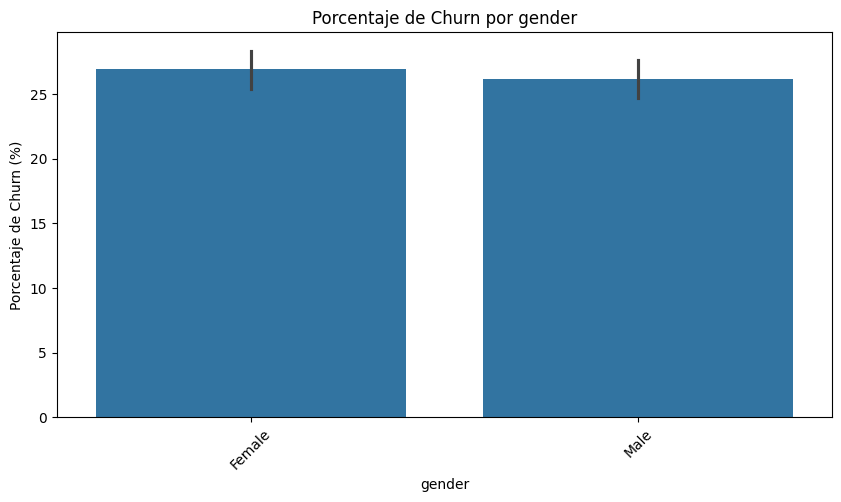


🔹 SeniorCitizen:
SeniorCitizen
1    41.7%
0    23.6%
Name: Churn_bin, dtype: object


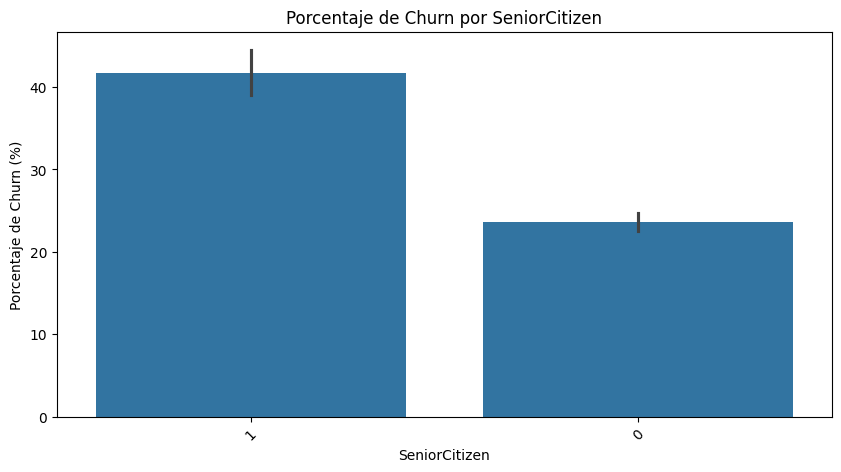


🔹 Partner:
Partner
No     33.0%
Yes    19.7%
Name: Churn_bin, dtype: object


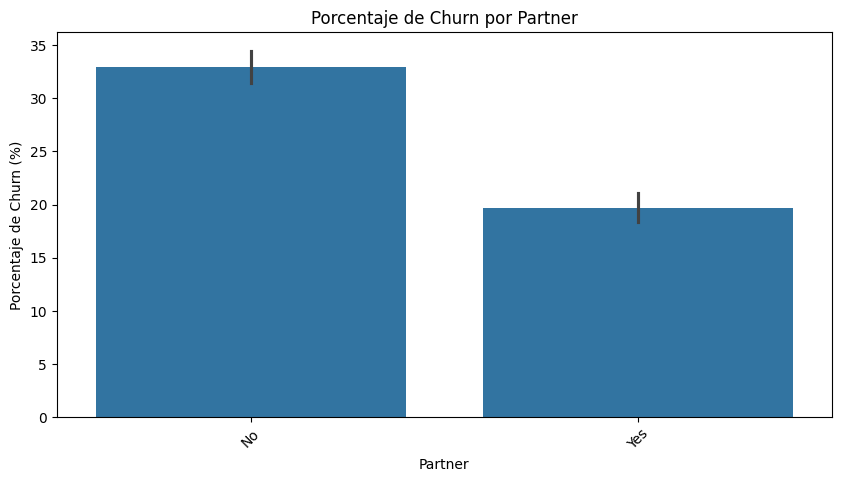


🔹 Dependents:
Dependents
No     31.3%
Yes    15.5%
Name: Churn_bin, dtype: object


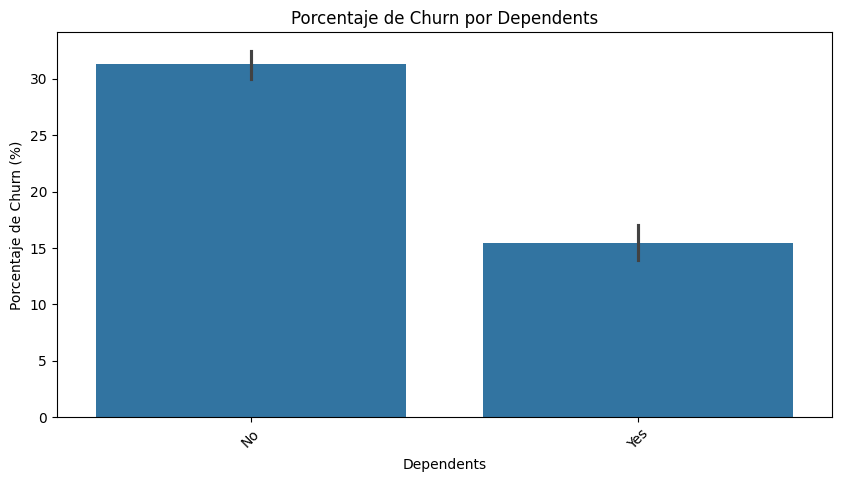


🔹 PhoneService:
PhoneService
Yes    26.7%
No     24.9%
Name: Churn_bin, dtype: object


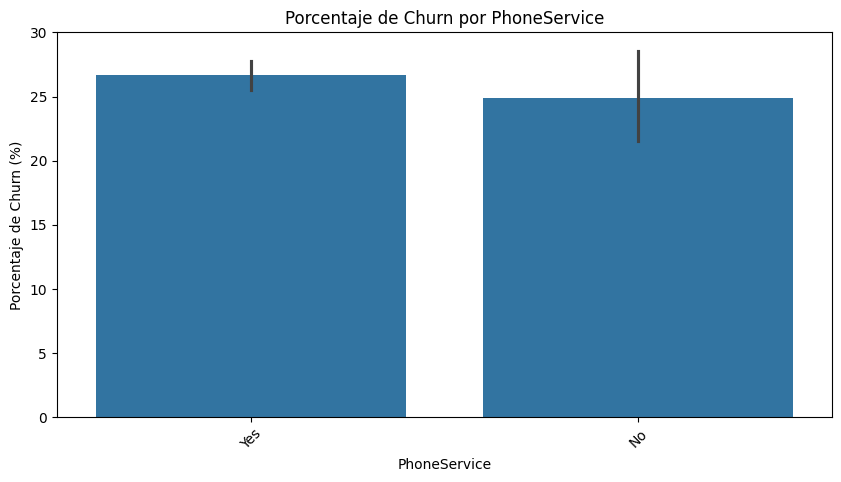


🔹 MultipleLines:
MultipleLines
Yes    28.6%
No     25.0%
Name: Churn_bin, dtype: object


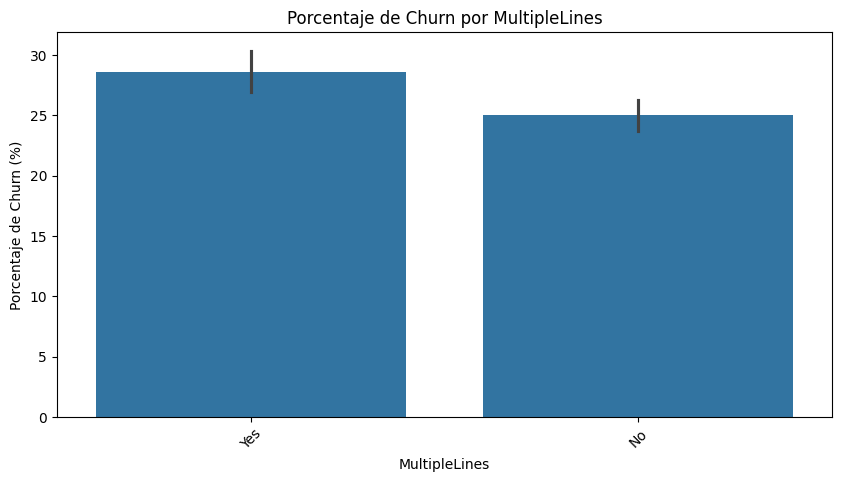


🔹 InternetService:
InternetService
Fiber optic    41.9%
DSL            19.0%
No              7.4%
Name: Churn_bin, dtype: object


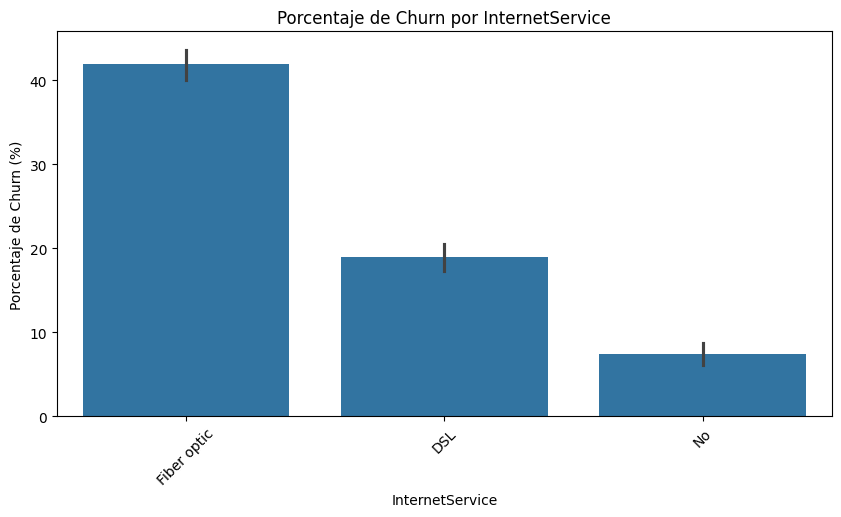


🔹 OnlineSecurity:
OnlineSecurity
No                     41.8%
Yes                    14.6%
No internet service     7.4%
Name: Churn_bin, dtype: object


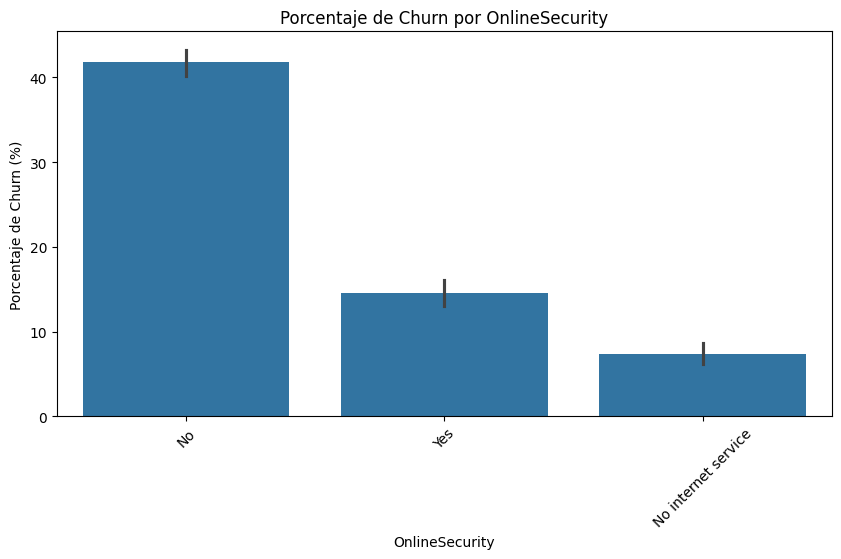


🔹 OnlineBackup:
OnlineBackup
No                     39.9%
Yes                    21.5%
No internet service     7.4%
Name: Churn_bin, dtype: object


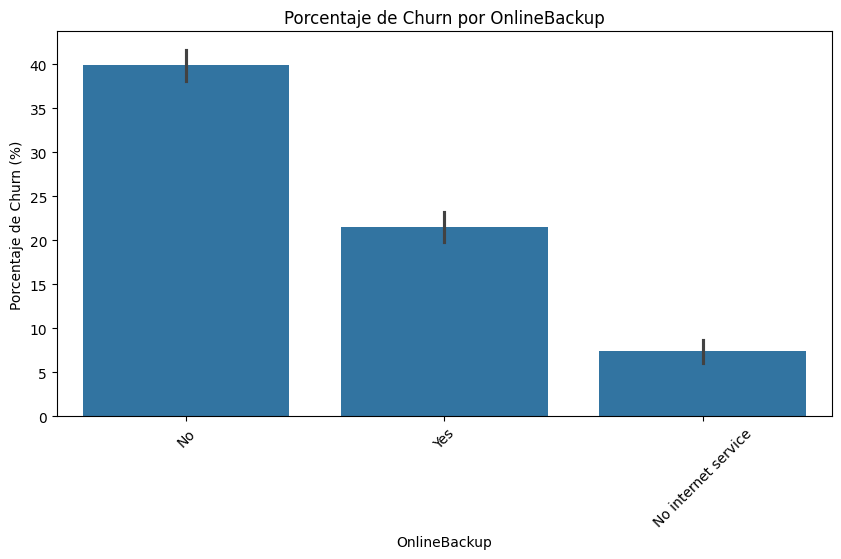


🔹 DeviceProtection:
DeviceProtection
No                     39.1%
Yes                    22.5%
No internet service     7.4%
Name: Churn_bin, dtype: object


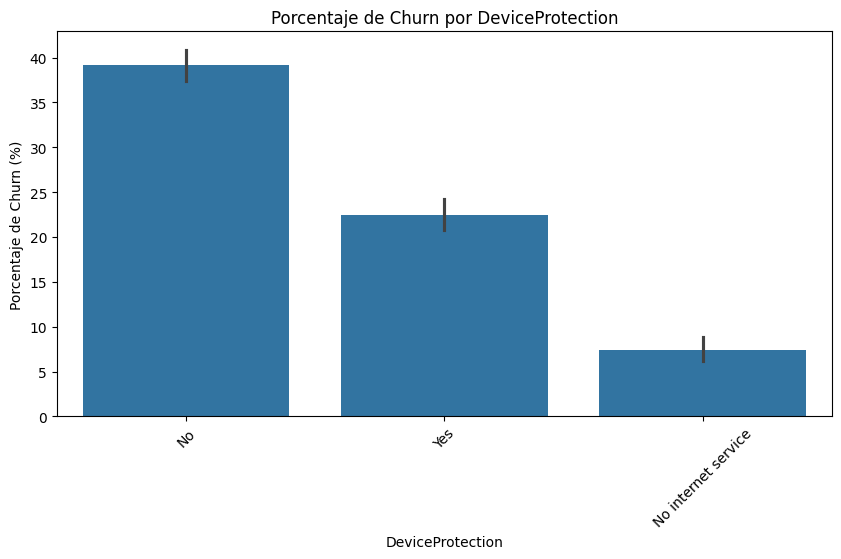


🔹 TechSupport:
TechSupport
No                     41.6%
Yes                    15.2%
No internet service     7.4%
Name: Churn_bin, dtype: object


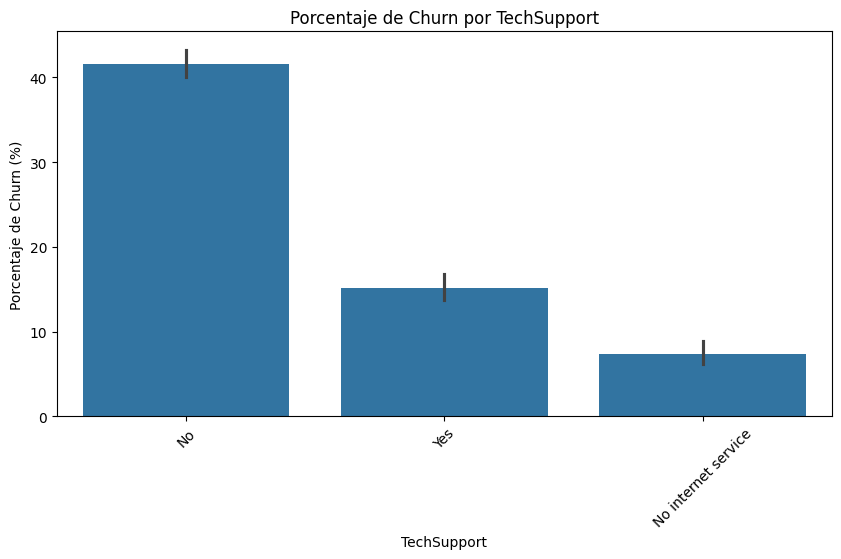


🔹 StreamingTV:
StreamingTV
No                     33.5%
Yes                    30.1%
No internet service     7.4%
Name: Churn_bin, dtype: object


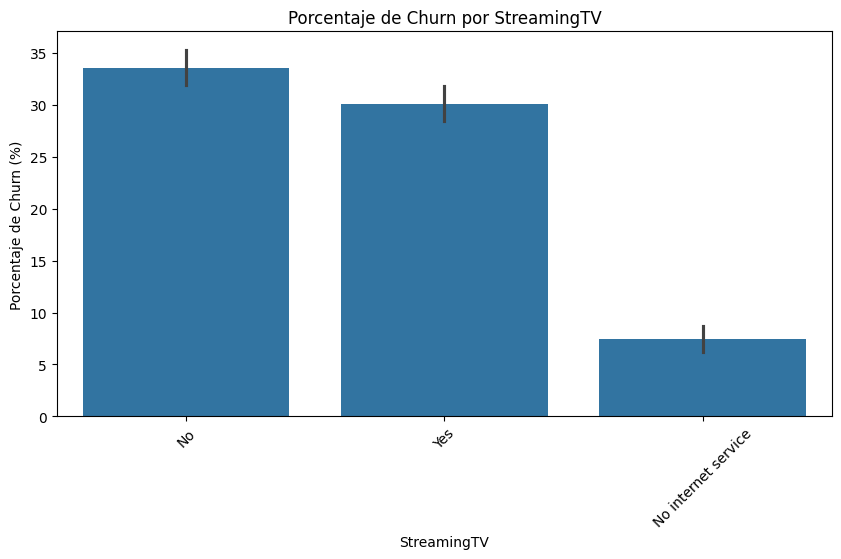


🔹 StreamingMovies:
StreamingMovies
No                     33.7%
Yes                    29.9%
No internet service     7.4%
Name: Churn_bin, dtype: object


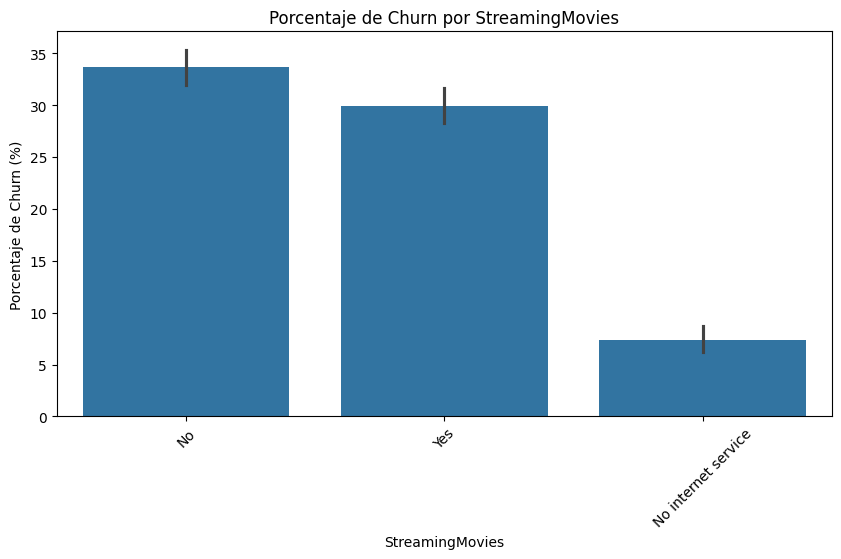


🔹 Contract:
Contract
Month-to-month    42.7%
One year          11.3%
Two year           2.8%
Name: Churn_bin, dtype: object


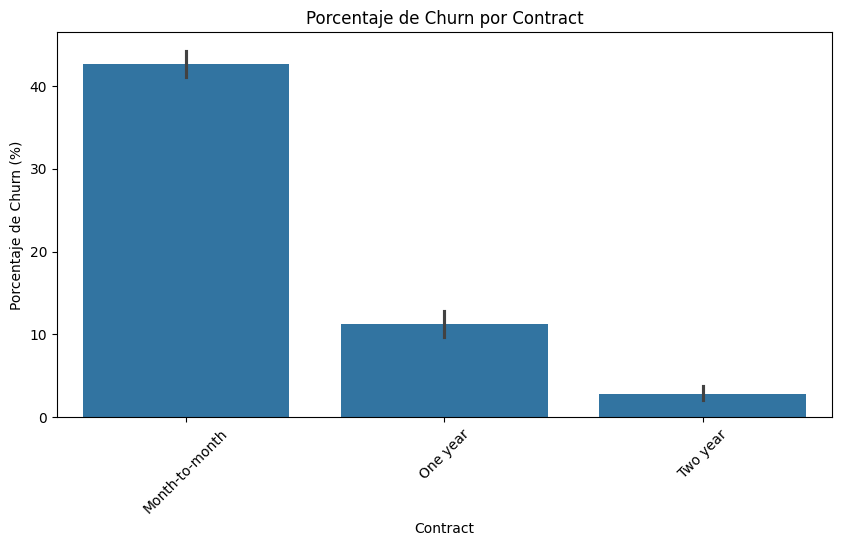


🔹 PaperlessBilling:
PaperlessBilling
Yes    33.6%
No     16.3%
Name: Churn_bin, dtype: object


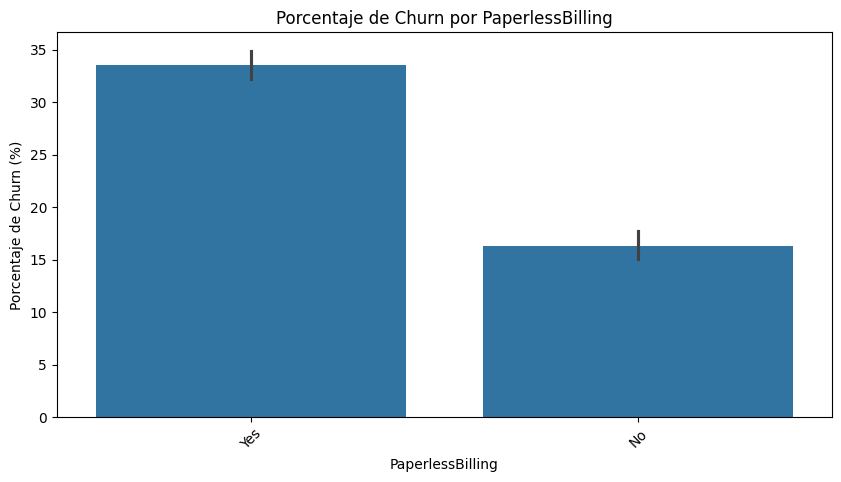


🔹 PaymentMethod:
PaymentMethod
Electronic check             45.3%
Mailed check                 19.1%
Bank transfer (automatic)    16.7%
Credit card (automatic)      15.2%
Name: Churn_bin, dtype: object


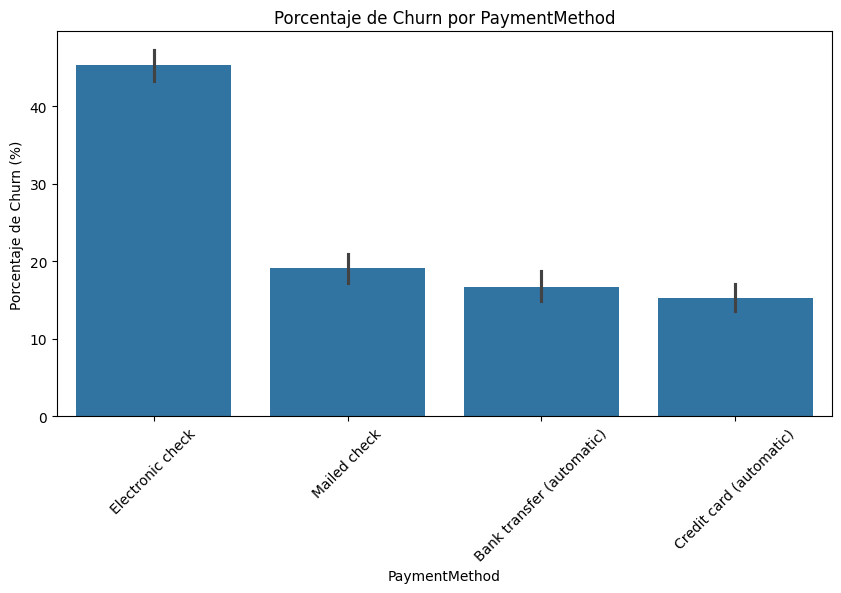

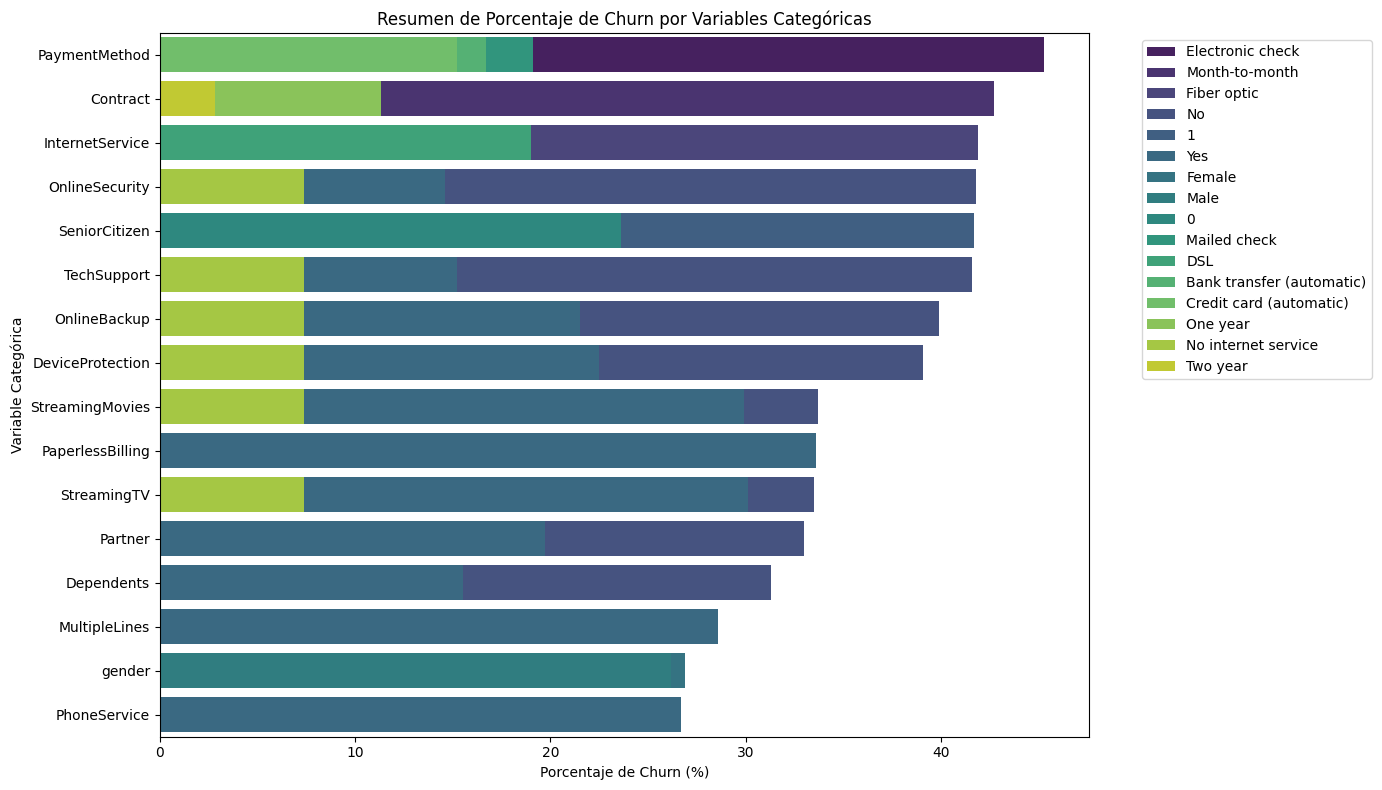

In [69]:
#2. Análisis de Porcentaje de Churn por Categoría

import matplotlib.pyplot as plt
import seaborn as sns

print("📊 Porcentaje de Evasión (Churn) por Variable Categórica:\n")

# Lista para almacenar todos los datos de churn
churn_data_list = []

for var in categorical_vars:
    # Calculamos el porcentaje de Churn por categoría
    churn_rate = df_normalized.groupby(var)['Churn_bin'].mean() * 100
    churn_rate = churn_rate.sort_values(ascending=False).round(1)

    print(f"\n🔹 {var}:")
    print(churn_rate.astype(str) + "%")

    # Gráfico de barras individual
    plt.figure(figsize=(10, 5))
    sns.barplot(x=var, y='Churn_bin', data=df_normalized,
                estimator=lambda x: sum(x)*100/len(x),
                order=churn_rate.index)
    plt.title(f'Porcentaje de Churn por {var}')
    plt.ylabel('Porcentaje de Churn (%)')
    plt.xticks(rotation=45)
    plt.show()

    # Almacenar datos para el gráfico resumen
    for category, rate in churn_rate.items():
        churn_data_list.append({'Variable': var, 'Categoría': category, 'Churn Rate': rate})

# Crear DataFrame con todos los datos de churn
churn_summary = pd.DataFrame(churn_data_list)

# Gráfico resumen de todas las variables categóricas
plt.figure(figsize=(14, 8))
sns.barplot(x='Churn Rate', y='Variable', hue='Categoría',
            data=churn_summary.sort_values('Churn Rate', ascending=False),
            dodge=False, palette='viridis')
plt.title('Resumen de Porcentaje de Churn por Variables Categóricas')
plt.xlabel('Porcentaje de Churn (%)')
plt.ylabel('Variable Categórica')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión**

Principales Hallazgos y Acciones para Reducir la Evasión (Churn)
🔍 Hallazgos Clave:
Métodos de Pago

📉 "Electronic check" tiene 45.3% de Churn (el más alto).

✅ Pagos automáticos (transferencia/tarjeta) tienen ≤16.7% Churn.

Tipo de Contrato

📉 Contrato mensual (Month-to-month): 42.7% Churn.

✅ Contratos anuales/bianuales: Churn ≤11.3%.

Servicios Adicionales

📉 Clientes sin seguridad online (41.8%) o soporte técnico (41.6%) tienen mayor Churn.

✅ Con estos servicios: Churn cae a 14.6% y 15.2% respectivamente.

Perfil Demográfico

📉 Adultos mayores (SeniorCitizen=1): 41.7% Churn vs 23.6% en menores.

📉 Clientes sin pareja (Partner=No) o dependientes: +30% Churn.

Internet vs Fibra Óptica

📉 Fibra óptica: 41.9% Churn (posiblemente por costo/expectativas).

✅ DSL: Solo 19% Churn.

🚀 Acciones Recomendadas:
Incentivar Contratos Anuales

Ofrecer descuentos por renovación anticipada.

Ejemplo: "10% de descuento al cambiar a plan anual".

Migrar a Pagos Automáticos

Campañas para cambiar de "electronic check" a transferencia/tarjeta automática.

Beneficio: "5% de descuento por pago automático".

Paquetes con Servicios de Protección

Promover OnlineSecurity + TechSupport en combos.

Mensaje: "Protección completa: reduce riesgos y mejora tu experiencia".

Programas para Adultos Mayores

Atención personalizada y planes especiales para este segmento.

Revisar Estrategia de Fibra Óptica

Analizar si el alto Churn se debe a problemas técnicos o expectativas no cumplidas.

📊 Impacto Esperado:
Variable	Churn Actual	Meta con Acciones
Contrato Month-to-month	42.7%	Reducir a 30-35%
Electronic check	45.3%	Reducir a 25-30%
Sin OnlineSecurity/Tech	41.8%	Reducir a 20-25%
Beneficio estimado: Reducción del 10-15% en Churn general, aumentando ingresos recurrentes.

# **ANALISIS EXTRA**
# ¡Extra! Análisis de correlación entre variables **texto en negrita**

Esta actividad es un extra, por lo tanto es OPCIONAL.

Como un paso adicional, puedes explorar la correlación entre diferentes variables del dataset. Esto puede ayudar a identificar qué factores tienen mayor relación con la evasión de clientes, como:

🔹 La relación entre la cuenta diaria y la evasión.
🔹 Cómo la cantidad de servicios contratados afecta la probabilidad de churn.

Puedes usar la función corr() de Pandas para calcular las correlaciones y visualizar los resultados con gráficos de dispersión o matrices de correlación.

Este análisis adicional puede proporcionar insights valiosos para la creación de modelos predictivos más robustos. 🚀

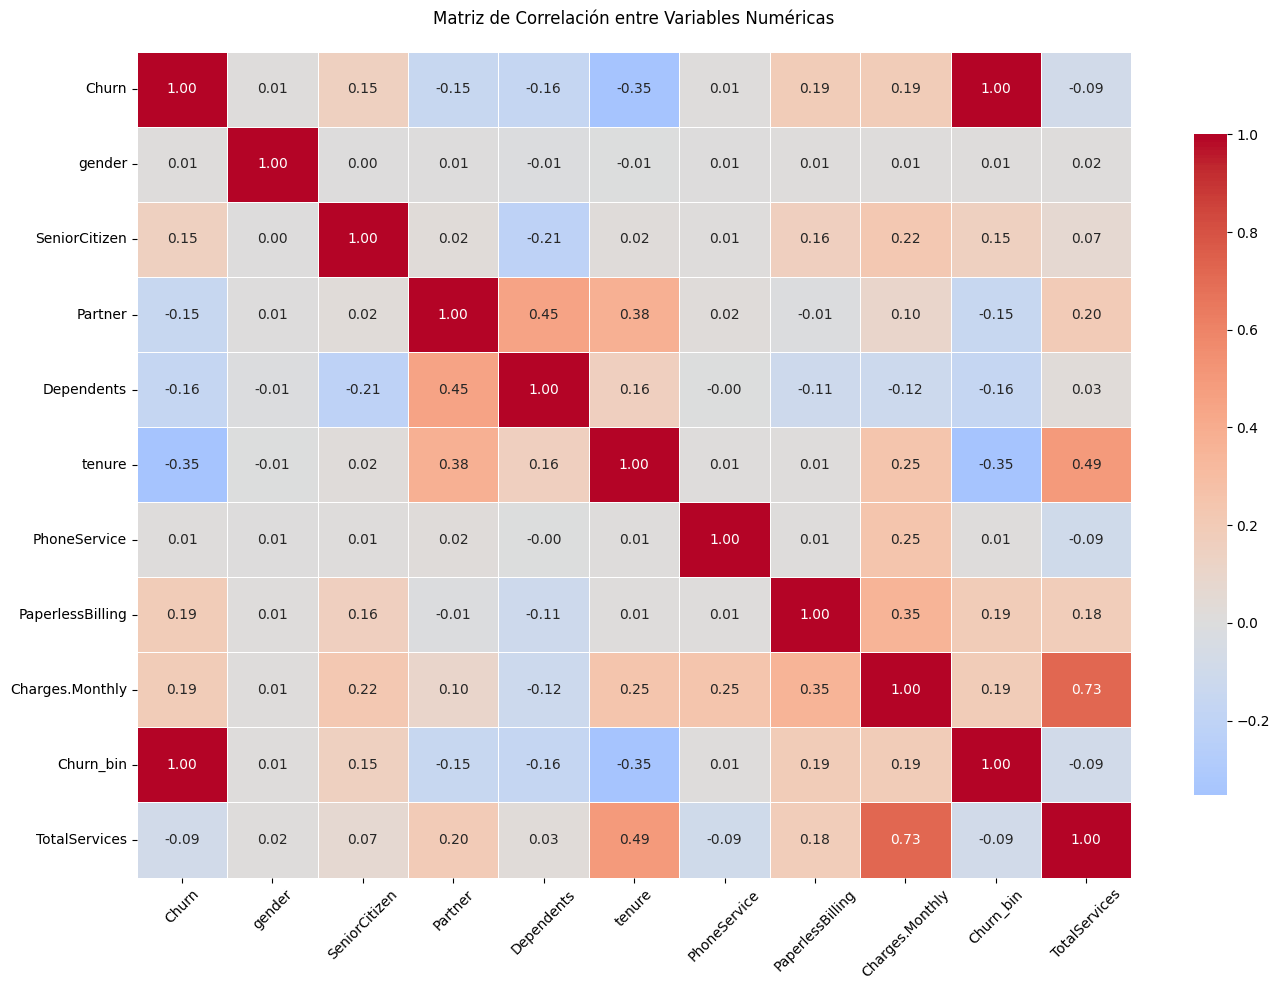

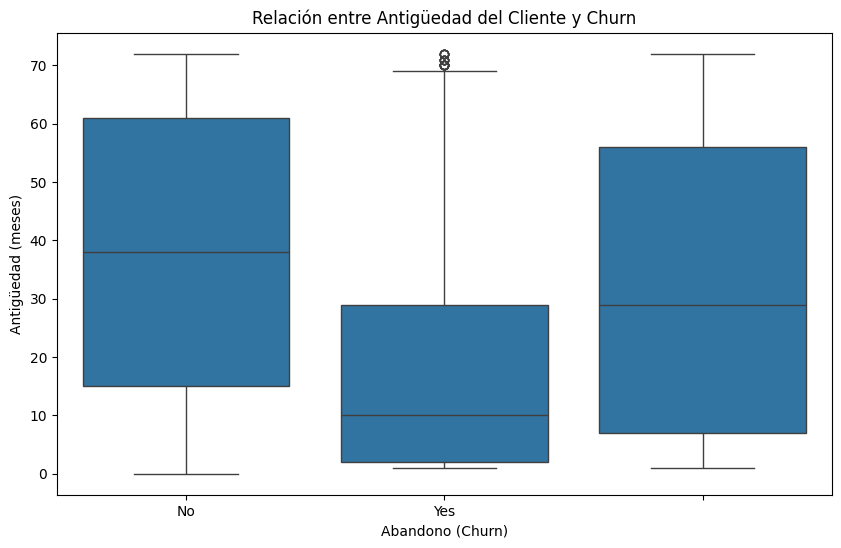

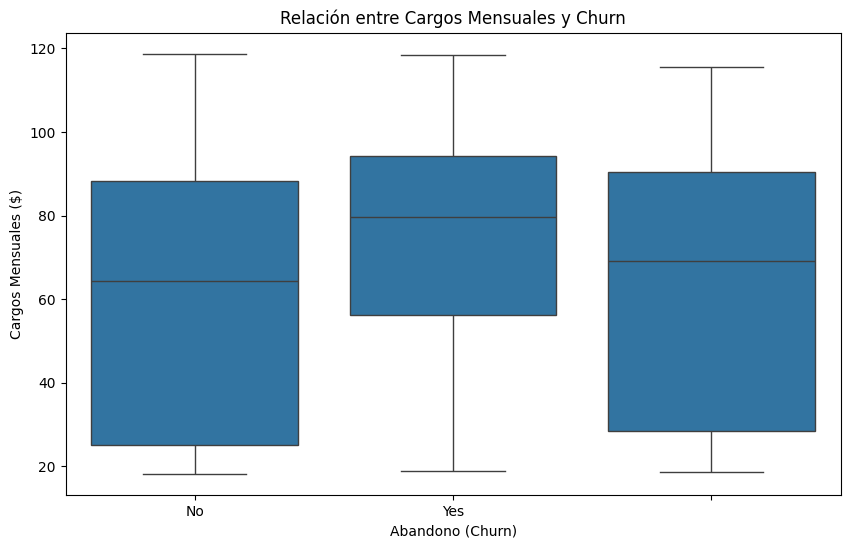


🔍 Correlación con Churn (ordenado por magnitud):
Churn_bin           1.000000
tenure             -0.352229
Charges.Monthly     0.193356
PaperlessBilling    0.191825
Dependents         -0.164221
SeniorCitizen       0.150889
Partner            -0.150448
TotalServices      -0.087698
PhoneService        0.011942
gender              0.008612
Name: Churn, dtype: float64


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preparación de datos numéricos
# Convertir variables categóricas relevantes a numéricas para el análisis
df_corr = df_normalized.copy()

# Mapear variables binarias
binary_mappings = {
    'Churn': {'Yes': 1, 'No': 0},
    'gender': {'Female': 1, 'Male': 0},
    'Partner': {'Yes': 1, 'No': 0},
    'Dependents': {'Yes': 1, 'No': 0},
    'PhoneService': {'Yes': 1, 'No': 0},
    'PaperlessBilling': {'Yes': 1, 'No': 0}
}

for col, mapping in binary_mappings.items():
    if col in df_corr.columns:
        df_corr[col] = df_corr[col].map(mapping)

# Crear variable de conteo de servicios adicionales
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies']
df_corr['TotalServices'] = df_corr[services].apply(lambda x: (x == 'Yes').sum(), axis=1)

# 2. Matriz de correlación
corr_matrix = df_corr.select_dtypes(include=['int64', 'float64']).corr()

# 3. Visualización de la matriz de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            center=0, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación entre Variables Numéricas', pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. Gráficos de dispersión para relaciones clave
# Relación entre antigüedad (tenure) y Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df_normalized)
plt.title('Relación entre Antigüedad del Cliente y Churn')
plt.ylabel('Antigüedad (meses)')
plt.xlabel('Abandono (Churn)')
plt.show()

# Relación entre cargos mensuales y Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Charges.Monthly', data=df_normalized)
plt.title('Relación entre Cargos Mensuales y Churn')
plt.ylabel('Cargos Mensuales ($)')
plt.xlabel('Abandono (Churn)')
plt.show()

# 5. Correlación específica con Churn
print("\n🔍 Correlación con Churn (ordenado por magnitud):")
churn_corr = corr_matrix['Churn'].sort_values(key=abs, ascending=False)
print(churn_corr[1:])  # Excluye la correlación consigo misma

In [76]:
corr_matrix


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Churn_bin,TotalServices
Churn,1.000000,0.008612,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193356,1.000000,-0.087698
gender,0.008612,1.000000,0.004288,0.005007,-0.012038,-0.005765,0.005073,0.011273,0.013889,0.008612,0.016069
SeniorCitizen,0.150889,0.004288,1.000000,0.022970,-0.212952,0.018187,0.010060,0.157734,0.220388,0.150889,0.068080
Partner,-0.150448,0.005007,0.022970,1.000000,0.448900,0.377551,0.018828,-0.011201,0.097122,-0.150448,0.201616
Dependents,-0.164221,-0.012038,-0.212952,0.448900,1.000000,0.159892,-0.003863,-0.111752,-0.115832,-0.164221,0.031230
tenure,-0.352229,-0.005765,0.018187,0.377551,0.159892,1.000000,0.010205,0.007949,0.247982,-0.352229,0.494282
PhoneService,0.011942,0.005073,0.010060,0.018828,-0.003863,0.010205,1.000000,0.013624,0.246709,0.011942,-0.094647
PaperlessBilling,0.191825,0.011273,0.157734,-0.011201,-0.111752,0.007949,0.013624,1.000000,0.353714,0.191825,0.184626
Charges.Monthly,0.193356,0.013889,0.220388,0.097122,-0.115832,0.247982,0.246709,0.353714,1.000000,0.193356,0.725037
Churn_bin,1.000000,0.008612,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193356,1.000000,-0.087698
